##### AS 

to rename the column generated ie ALIASING

##### WITH...AS

common table expression __(CTE)__

- CTE is a temporary table that we return within the query
- CTE are helpful for splitting queries into readable chunks


In [1]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'smiling-audio-287409-77f38c77b232.json'
from google.cloud import bigquery

#### Q1 How many Bitcoin transactions are made per month?

We're going to use a CTE to find out how many Bitcoin transactions were made each day for the entire timespan of a bitcoin transaction dataset.

We'll investigate the transactions table. 

In [2]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:19: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,aaac8b454e079237b8509c422b8a0ebd95e3eca5944b95...,137,137,1,0,000000000000000000d6cdda66edb65e8969566ca65fe3...,484015,2017-09-07 13:43:30+00:00,2017-09-01,0,1,None,1266641901,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,8505c4277a8da0450cb6fd345b409a87218e09987c7e92...,193,166,1,0,000000000000000000427219aa8b931acb167f582e9b9c...,485083,2017-09-13 19:30:26+00:00,2017-09-01,0,2,None,1367011480,True,0,[],"[{'index': 0, 'script_asm': 'OP_HASH160 6dffc0..."
2,d1a2060a08e8cd54480de8a0aac761b8667c175a7de08e...,213,186,1,0,000000000000000000d5ed15beb3085719e8f1b95f2924...,485005,2017-09-13 10:25:46+00:00,2017-09-01,0,2,None,1255484937,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,2fba35aaba056d4028d512c0fb134ff41d2d5c504fc7a1...,213,186,1,0,0000000000000000009fd230518a5b3d50ebcd5120a844...,486934,2017-09-25 17:28:19+00:00,2017-09-01,0,2,None,1431309437,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,630af30aa1ade3de86df071d35b6eb28e0590cf7e0bcaa...,217,190,1,0,000000000000000000841e1fa84e8e5abdfa000936524c...,483854,2017-09-06 16:06:09+00:00,2017-09-01,0,2,None,1530785512,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


Since the __block_timestamp__ column contains the date of each transaction in DATETIME format, we'll convert these into DATE format using the __DATE()__ command.

We do that using a CTE, and then the next part of the query counts the number of transactions for each date and sorts the table so that earlier dates appear first.

In [3]:
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()


,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


Since they're returned sorted, we can easily plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset.

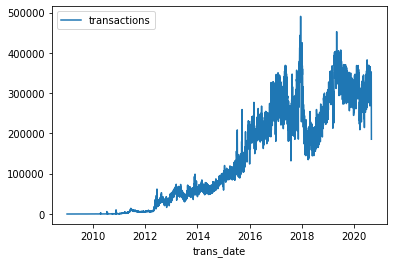

In [4]:
transactions_by_date.set_index('trans_date').plot()

## Q2.1



In [5]:
# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)


table_ref = dataset_ref.table("taxi_trips")
table = client.get_table(table_ref)

client.list_rows(table, max_results= 6).to_dataframe()

C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda4\envs\tensorflow gpu\lib\site-packages\ipykernel_launcher.py:11: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  # This is added back by InteractiveShellApp.init_path()


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,7c9f714abb77949de0447e0f1b444519328a1bb9,1b7aef0344f45914e7942efad05553934fe222c880a1cb...,2014-07-23 15:30:00+00:00,2014-07-23 15:30:00+00:00,360,0.0,None,None,None,None,...,0.0,5.65,Cash,Taxi Affiliation Services,None,None,None,None,None,None
1,ad6c538743ed0a1840304328544ea5ee41b94a70,de2906134604016e07158e3221cd351fea2b064a692882...,2014-06-19 20:00:00+00:00,2014-06-19 20:00:00+00:00,0,0.0,None,None,None,None,...,0.0,22.85,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
2,8b46925a87cf3ac625abca22bc89f95321f044a6,4e4e2beb75e034fa063276e08edaba09a3bafd3a83d115...,2014-06-19 22:00:00+00:00,2014-06-19 22:00:00+00:00,0,0.0,None,None,None,None,...,0.0,14.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,c063feee4d7a6b0cc73243999bab4f7c19afd31b,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-01-21 15:00:00+00:00,2014-01-21 15:15:00+00:00,540,0.0,None,None,None,None,...,0.0,8.45,Credit Card,Taxi Affiliation Services,None,None,None,None,None,None
4,5f7639328e2972eaaaa07713ce96d5b22e1241de,c54481366d44d8c3011e54e798279f735ed2b51d200a76...,2014-08-28 07:30:00+00:00,2014-08-28 07:30:00+00:00,0,0.0,None,None,None,None,...,0.0,16.62,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
5,8d41ca3b4026ff2907d9e4974460de1b3d4b1b12,c39593bba0a78fe55a4e074bd979751d851170b0de3bc1...,2014-07-20 18:30:00+00:00,2014-07-20 18:30:00+00:00,0,0.0,None,None,None,None,...,0.0,10.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None


### 2.1 Determine when this data is from

If the data is sufficiently old, we might be careful before assuming the data is still relevant to traffic patterns today. Write a query that counts the number of trips in each year.  

Your results should have two columns:
- `year` - the year of the trips
- `num_trips` - the number of trips in that year

Hints:
- When using **GROUP BY** and **ORDER BY**, you should refer to the columns by the alias `year` that you set at the top of the **SELECT** query.
- The SQL code to **SELECT** the year from `trip_start_timestamp` is <code>SELECT EXTRACT(YEAR FROM trip_start_timestamp)</code>


In [6]:
rides_per_year_query = """
                SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, COUNT(1) AS num_trips
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                GROUP BY year
                ORDER BY year


"""

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_year_query_job = client.query(rides_per_year_query,job_config=safe_config)# Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_year_result = rides_per_year_query_job.to_dataframe() # Your code goes here

# View results
print(rides_per_year_result)

   year  num_trips
0  2013   27217716
1  2014   37395436
2  2015   32385875
3  2016   31759339
4  2017   24988003
5  2018   20732088
6  2019   16477365
7  2020    3113687


### 2.2 Dive slightly deeper

You'd like to take a closer look at rides from 2017.  Copy the query you used above in `rides_per_year_query` into the cell below for `rides_per_month_query`.  Then modify it in two ways:
1. Use a **WHERE** clause to limit the query to data from 2017.
2. Modify the query to extract the month rather than the year.

In [8]:
rides_per_month_query = """
                SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month, COUNT(1) AS num_trips
                FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2017
                GROUP BY month
                ORDER BY month


""" 

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_month_query_job = client.query(rides_per_month_query, job_config=safe_config)# Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_month_result = rides_per_month_query_job.to_dataframe() # Your code goes here

# View results
print(rides_per_month_result)


    month  num_trips
0       1    1972071
1       2    1909802
2       3    2362105
3       4    2194702
4       5    2323386
5       6    2324472
6       7    2054299
7       8    2079861
8       9    1950631
9      10    2141197
10     11    1907997
11     12    1767480


### 2.3 Write the query

It's time to step up the sophistication of your queries.  Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.

Your results should have three columns:
- `hour_of_day` - sort by this column, which holds the result of extracting the hour from `trip_start_timestamp`.
- `num_trips` - the count of the total number of trips in each hour of the day (e.g. how many trips were started between 6AM and 7AM, independent of which day it occurred on).
- `avg_mph` - the average speed, measured in miles per hour, for trips that started in that hour of the day.  Average speed in miles per hour is calculated as `3600 * SUM(trip_miles) / SUM(trip_seconds)`. (The value 3600 is used to convert from seconds to hours.)

Restrict your query to data meeting the following criteria:
- a `trip_start_timestamp` between **2017-01-01** and **2017-07-01**
- `trip_seconds` > 0 and `trip_miles` > 0

You will use a common table expression (CTE) to select just the relevant rides.  Because this dataset is very big, this CTE should select only the columns you'll need to create the final output (though you won't actually create those in the CTE -- instead you'll create those in the later **SELECT** statement below the CTE).

This is a much harder query than anything you've written so far.  Good luck!

In [14]:
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, trip_miles, trip_seconds
                          
                          
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2017-01-01' AND 
                         trip_start_timestamp < '2017-07-01' AND 
                         trip_seconds > 0 AND 
                         trip_miles > 0
               )
               SELECT hour_of_day, 
                      COUNT(1) AS num_trips, 
                      3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph 
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
speeds_query_job = client.query(speeds_query, job_config=safe_config) # Your code here

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe() # Your code here

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046
